In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
# Ingredients - American
ingr_one = pd.read_csv('american/main_amer_ingredients1.csv')
ingr_two = pd.read_csv('american/main_amer_ingredients2.csv')
ingr_thr = pd.read_csv('american/main_amer_ingredients3.csv')
ingr_fou = pd.read_csv('american/main_amer_ingredients4.csv')

In [3]:
data_ingred_amer = pd.concat([ingr_one, ingr_two, ingr_thr, ingr_fou], join = 'outer', axis =0, ignore_index=True)
data_ingred_amer['cuisine'] = 'American'

In [4]:
# Ingredients - Italian
ingr_one = pd.read_csv('italian/main_ital_ingredients1.csv')
ingr_two = pd.read_csv('italian/main_ital_ingredients2.csv')
ingr_thr = pd.read_csv('italian/main_ital_ingredients3.csv')
ingr_fou = pd.read_csv('italian/main_ital_ingredients4.csv')

In [5]:
data_ingred_ital = pd.concat([ingr_one, ingr_two, ingr_thr, ingr_fou], join = 'outer', axis =0, ignore_index=True)
data_ingred_ital['cuisine'] = 'Italian'

In [6]:
# Ingredients - Mexian
ingr_one = pd.read_csv('mexican/main_mex_ingredients1.csv')
ingr_two = pd.read_csv('mexican/main_mex_ingredients2.csv')
ingr_thr = pd.read_csv('mexican/main_mex_ingredients3.csv')
ingr_fou = pd.read_csv('mexican/main_mex_ingredients4.csv')

In [7]:
data_ingred_mex = pd.concat([ingr_one, ingr_two, ingr_thr, ingr_fou], join = 'outer', axis =0, ignore_index=True)
data_ingred_mex['cuisine'] = 'Mexican'

In [8]:
# Ingredients - Asian
ingr_one = pd.read_csv('asian/main_as_ingredients1.csv')
ingr_two = pd.read_csv('asian/main_as_ingredients2.csv')
ingr_thr = pd.read_csv('asian/main_as_ingredients3.csv')
ingr_fou = pd.read_csv('asian/main_as_ingredients4.csv')

In [9]:
data_ingred_asian = pd.concat([ingr_one, ingr_two, ingr_thr, ingr_fou], join = 'outer', axis =0, ignore_index=True)
data_ingred_asian['cuisine'] = 'Asian'

In [10]:
# Ingredients - Asian
ingr_one = pd.read_csv('mediterranean/main_medit_ingredients1.csv')
ingr_two = pd.read_csv('mediterranean/main_medit_ingredients2.csv')
ingr_thr = pd.read_csv('mediterranean/main_medit_ingredients3.csv')
ingr_fou = pd.read_csv('mediterranean/main_medit_ingredients4.csv')

In [11]:
data_ingred_medit = pd.concat([ingr_one, ingr_two, ingr_thr, ingr_fou], join = 'outer', axis =0, ignore_index=True)
data_ingred_medit['cuisine'] = 'Mediterranean'

In [12]:
data_all_ingr = pd.concat([data_ingred_amer, data_ingred_asian, data_ingred_ital, data_ingred_medit,
                          data_ingred_mex], join = 'outer', axis = 0, ignore_index=True)

In [19]:
# Send full ingredients to csv
# data_all_ingr.to_csv('../ingredients_combined/full_ingredients.csv', encoding='utf-8')

Read in full_ingredients CSV

In [2]:
data_all_ing = pd.read_csv('../ingredients_combined/full_ingredients.csv')

In [3]:
data_reduced = data_all_ing[['id', 'ingredient_list', 'cuisine']]

In [5]:
# Remove non-alpha chcaracters and convert to lower case
# Note, this is still in string form here
ingredient_string = [re.sub('[^A-Za-z]', ' ', z).strip().lower() for z in data_reduced['ingredient_list']]

# To lemmatize each word, need to convert the string to a list to allow lemmatizer to iterate through
convert_to_list = [z.split() for z in ingredient_string]
lemmatized = [WordNetLemmatizer().lemmatize(z) for z in ingredient_string]

# Here lematizer iterates through list; couldn't get it to work with list comprehension
lemmatized = []
for _list in convert_to_list:
    sub_list = []
    for word in _list:
        sub_list.append(WordNetLemmatizer().lemmatize(word))
    lemmatized.append(sub_list)

# Then need to convert the list back into a string
data_reduced['ingredient_string'] = [' '.join(z) for z in lemmatized]

/Users/michaelshea/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# Label encode target (cuisine)
le = LabelEncoder()
data_reduced['cuisine_encode'] = le.fit_transform(data_reduced.cuisine)

/Users/michaelshea/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
# Split data into feature and target
X = data_reduced['ingredient_string']
y = data_reduced.cuisine_encode

In [8]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# Instantiate vectorizer
vect = TfidfVectorizer()

In [10]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [11]:
# import/instantiate/fit
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [13]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.916735028712


In [14]:
# View predictions vs actual
test_df = pd.DataFrame(X_test)
test_df = test_df.join(data_reduced, how='left', rsuffix='orig_string')
test_df['y_pred'] = list(le.inverse_transform(y_pred_class))

In [18]:
test_df.head()

,ingredient_string,id,ingredient_list,cuisine,ingredient_stringorig_string,cuisine_encode,y_pred
98,flank steak light brown sugar bourbon whiskey ...,Sugar-Steak-with-Bourbon-576585,"[flank steak, light brown sugar, bourbon whisk...",American,flank steak light brown sugar bourbon whiskey ...,0,American
7104,extra virgin olive oil fresh lemon juice cumin...,Mediterranean-Pita-Panzanella-1177493,"[extra-virgin olive oil, fresh lemon juice, cu...",Mediterranean,extra virgin olive oil fresh lemon juice cumin...,3,Mediterranean
6308,pizza dough feta cheese garlic clove olive oil...,Greek-pizza-333514,"[pizza doughs, feta cheese, garlic cloves, oli...",Mediterranean,pizza dough feta cheese garlic clove olive oil...,3,Mediterranean
7102,quinoa veggie chicken chicken breast red bell ...,Chicken-Souvlaki-Grilled-Veggie-and-Quinoa-Bow...,"[quinoa, veggies, chicken, chicken breasts, re...",Mediterranean,quinoa veggie chicken chicken breast red bell ...,3,Mediterranean
8634,green giant creamed spinach elbow macaroni tom...,Mexican-Macaroni-Casserole-1592865,"[Green Giant Creamed Spinach, elbow macaroni, ...",Mexican,green giant creamed spinach elbow macaroni tom...,4,Mexican


In [1]:
# Isolate incorrect predictions in test_df
# Code looks a bit weird -- just pulling certain columns at the end in double square brackets
incorrect_predictions = test_df[test_df.cuisine != test_df.y_pred][['id', 'ingredient_list', 'cuisine', 'y_pred']]
incorrect_predictions.head()

NameError: name 'test_df' is not defined

In [51]:
# Create incorrect pairings column
incorrect_predictions['incorrect_pairings'] = zip(incorrect_predictions.cuisine, incorrect_predictions.y_pred)

In [64]:
counts[:9]

(Mediterranean, Italian)     38
(Italian, Mediterranean)     31
(American, Mexican)          28
(American, Italian)          22
(American, Mediterranean)    20
(Mediterranean, American)    14
(Asian, American)            13
(Italian, American)          11
(American, Asian)             6
Name: incorrect_pairings, dtype: int64

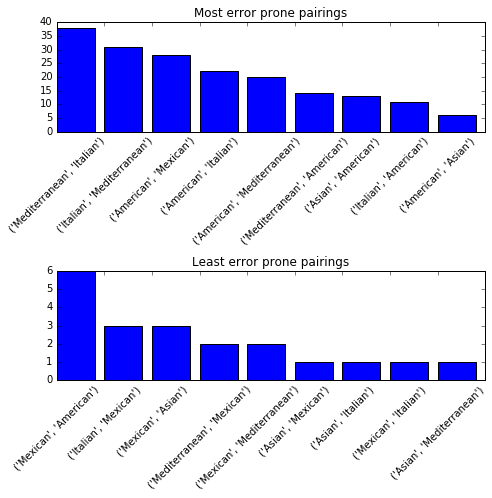

In [75]:
counts_high = incorrect_predictions.incorrect_pairings.value_counts()[:9]
counts_low = incorrect_predictions.incorrect_pairings.value_counts()[9:]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat


ax0.bar(range(len(counts_high)), counts_high)
ax0.set_xticklabels(counts_high.index, rotation=45)
ax0.set_title('Most error prone pairings')

ax1.bar(range(len(counts_low)), counts_low)
ax1.set_xticklabels(counts_low.index, rotation=45)
ax1.set_title('Least error prone pairings')

plt.tight_layout()

In [96]:
# predict class probabilities
# y_pred_prob = nb.predict_proba(X_test_dtm)

In [20]:
# calculate the AUC using y_test_binary and y_pred_prob
# print metrics.roc_auc_score(y_test, y_pred_prob)

# oh wait, this produces an error because ROC doesn't handle multiclass classification

In [19]:
# Redo with label binarizer and One vs. All multiclass model
lb = LabelBinarizer()
y = lb.fit_transform(data_reduced.cuisine_encode)
X = data_reduced['ingredient_string']

In [30]:
n_classes = y.shape[1]
n_classes

5

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
# Instantiate tfid-vectorizer
vect = TfidfVectorizer()

In [22]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [23]:
classifier = OneVsRestClassifier(MultinomialNB())
classifier.fit(X_train_dtm, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1)

In [24]:
# make class predictions
y_pred_class = classifier.predict(X_test_dtm)

In [35]:
# make probability predictions
y_pred_prob = classifier.predict_proba(X_test_dtm)

In [25]:
y_pred_class

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [26]:
y_test

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [27]:
print metrics.accuracy_score(y_test, y_pred_class)

0.818703855619


Note to self: I left off with the label_binarizer. I already produced a model, with no tuning whatsoever, that produced an accuracy score of 91%. 

However, you cannot produce an ROC curve with multiclass predictions, unless you use the label_binarizer and employ a One-vs-all approach to the classification. Up next will be to compute the predicted probabilities for each class and build an ROC curve for each. See sklearn stuff on this.

In [37]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


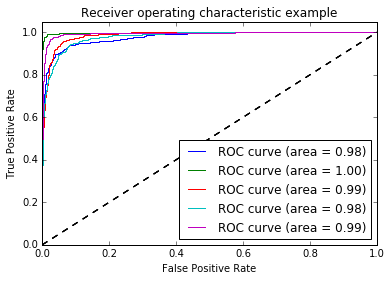

In [40]:
# Plot of a ROC curve for a specific class

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
plt.legend(loc="lower right")

In [83]:
# The second predicted class had an area under ROC of 1, meaning 100% accurate predictions
# Find out which class this was:

# check classes of label binarizer
print lb.classes_

# check classes of label encoder
print le.classes_

# after comparing, it's clear that predictions for asian recipes are strongest

[0 1 2 3 4]
['American' 'Asian' 'Italian' 'Mediterranean' 'Mexican']
